# Introduction aux données spatiales avec Geopandas

Lino Galiana  
2025-10-06

<div class="badge-container"><div class="badge-text">Pour essayer les exemples présents dans ce tutoriel :</div><a href="https://github.com/linogaliana/python-datascientist-notebooks/blob/main/notebooks/manipulation/03_geopandas_intro.ipynb" target="_blank" rel="noopener"><img src="https://img.shields.io/static/v1?logo=github&label=&message=View%20on%20GitHub&color=181717" alt="View on GitHub"></a>
<a href="https://datalab.sspcloud.fr/launcher/ide/vscode-python?autoLaunch=true&name=«03_geopandas_intro»&init.personalInit=«https%3A%2F%2Fraw.githubusercontent.com%2Flinogaliana%2Fpython-datascientist%2Fmain%2Fsspcloud%2Finit-vscode.sh»&init.personalInitArgs=«manipulation%2003_geopandas_intro%20correction»" target="_blank" rel="noopener"><img src="https://custom-icon-badges.demolab.com/badge/SSP%20Cloud-Lancer_avec_VSCode-blue?logo=vsc&logoColor=white" alt="Onyxia"></a>
<a href="https://datalab.sspcloud.fr/launcher/ide/jupyter-python?autoLaunch=true&name=«03_geopandas_intro»&init.personalInit=«https%3A%2F%2Fraw.githubusercontent.com%2Flinogaliana%2Fpython-datascientist%2Fmain%2Fsspcloud%2Finit-jupyter.sh»&init.personalInitArgs=«manipulation%2003_geopandas_intro%20correction»" target="_blank" rel="noopener"><img src="https://img.shields.io/badge/SSP%20Cloud-Lancer_avec_Jupyter-orange?logo=Jupyter&logoColor=orange" alt="Onyxia"></a>
<a href="https://colab.research.google.com/github/linogaliana/python-datascientist-notebooks-colab//blob/main//notebooks/manipulation/03_geopandas_intro.ipynb" target="_blank" rel="noopener"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"></a><br></div>

> **Note**
>
> Ceci est la version française 🇫🇷 de ce chapitre, pour voir la version anglaise allez <a href="/home/runner/work/python-datascientist/python-datascientist/en/content/manipulation/03_geopandas_intro.qmd">ici</a>.

> **Compétences à l’issue de ce chapitre**
>
> -   Connaître les structures de données centrales de **GeoPandas** : `GeoSeries` et `GeoDataFrame`, extensions respectives de `pandas.Series` et `pandas.DataFrame` pour gérer des géométries spatiales ;
> -   Lire des données géospatiales depuis des fichiers variés (GeoPackage, Shapefile, GeoJSON…) avec la méthode `.read_file()` ;
> -   Appliquer les méthodes standard de `pandas` sur un `GeoDataFrame`, notamment `head()` pour explorer les données tout en conservant les géométries ;
> -   Visualiser facilement des données géospatiales avec la méthode `.plot()` intégrée, pour créer rapidement des cartes statiques ;
> -   Comprendre et manipuler les systèmes de projection : définir un CRS avec `set_crs` et reprojeter les données avec `to_crs`.

# 1. Introduction

## 1.1 Quelle différence avec des données traditionnelles ?

Les chapitres précédents ont permis de découvrir la manière
dont des données structurées peuvent être valorisées
grâce à la librairie `Pandas`. Nous allons maintenant découvrir l’analyse
de données plus complexes, à savoir les données spatiales.
Ces
dernières sont une sophistication des données tabulaires puisqu’en plus
de partager les propriétés de celles-ci (données aplaties dans une structure de colonnes et de lignes), elles comportent une dimension géographique supplémentaire. Celle-ci est plus ou moins complexe selon la nature des données: cela peut être des points (coordonnées de localisation en deux dimensions), des lignes (une suite de points), des lignes directionnelles (la même structure précédemment mais avec une direction), des polygones (un ensemble de points)… Cette diversité des objets géographiques vise à permettre des systèmes d’information et de représentation de nombreux objets géographiques.

Par la suite, nous entendrons par *“données spatiales”* l’ensemble des données qui portent sur les caractéristiques géographiques des objets (localisation, contours, liens).
Les caractéristiques géographiques des objets sont décrites à l’aide d’un **système de coordonnées**. Celles-ci
permettent de représenter l’objet géographique dans un espace euclidien à deux dimensions $(x,y)$.
Le passage de l’espace réel (la Terre, qui est une sphère en trois dimensions) à l’espace plan
se fait grâce à un **système de projection**.

## 1.2 Structure des données spatiales

Les données spatiales rassemblent classiquement deux types de données :

1.  des **données géographiques** (ou géométries) : objets géométriques tels que des points, des vecteurs, des polygones, ou des maillages (*raster*). Exemple: la forme de chaque commune, les coordonnées d’un bâtiment;
2.  des **données attributaires** (ou attributs) : des mesures et des caractéristiques associées aux objets géométriques. Exemple: la population de chaque commune, le nombre de fenêtres et le nombre d’étages d’un bâtiment.

**Les données spatiales sont fréquemment traitées à l’aide d’un système d’information géographique (SIG)**, c’est-à-dire un système d’information capable de stocker, d’organiser et de présenter des données alphanumériques spatialement référencées par des coordonnées dans un système de référence (CRS). `Python` dispose de fonctionnalités lui permettant de réaliser les mêmes tâches qu’un SIG (traitement de données spatiales, représentations cartographiques).

## 1.3 Les données spatiales sont incontournables

D’un usage initialement essentiellement militaire ou administratif, la production cartographique est, depuis au moins le XIXe siècle, très fréquente
pour représenter de l’information socioéconomique. La représentation la plus connue dans ce domaine
est la carte par aplat de couleur, dite carte choroplèthe[1].

D’après Chen et al. (2008), la première représentation de ce type
a été proposée par Charles Dupin en 1926
pour représenter les niveaux d’instruction sur le territoire français.
L’émergence des cartes choroplèthes est en effet indissociable
de l’organisation du pouvoir sous forme d’entités pensées
politiques supposées unitaires:
les cartes du monde représentent souvent des aplats de couleurs à partir
des nations, les cartes nationales à partir d’échelons administratifs
(régions, départements, communes, mais aussi Etats ou *landers*).

![La première carte choroplèthes par Dupin (1826)](https://upload.wikimedia.org/wikipedia/commons/thumb/3/38/Carte_figurative_de_l%27instruction_populaire_de_la_France.jpg/800px-Carte_figurative_de_l%27instruction_populaire_de_la_France.jpg).

Si la production d’information géographique a pu être très liée à un usage militaire puis à la gestion administrative d’un territoire, la
numérisation de l’économie ayant démultipliée les acteurs concernés par la collecte et la mise à disposition de données géographique, la manipulation et la représentation de données spatiales n’est plus l’apanage des géographes et géomaticiens. Les *data scientists* doivent être capables de rapidement explorer la structure d’un jeu de données géographique comme ils le feraient d’un jeu de données tabulaires classiques.

## 1.4 Où trouver la donnée spatiale française ?

Lors de notre périple de découverte de `Pandas`,
nous avons déjà rencontré quelques sources géolocalisées,
notamment produites par l’Insee. Cette institution publie
de nombreuses statistiques locales, par exemple les données
Filosofi que nous avons rencontrées au chapitre précédent. Au-delà
de l’Insee, l’ensemble des institutions du système
statistique public (Insee et services statistiques ministériels)
publie de nombreuses sources de données agrégées à différentes
mailles géographiques: à un niveau infracommunal (par exemple par [carreaux de 200m](https://www.insee.fr/fr/statistiques/6215138?sommaire=6215217)),
au niveau communal ou à des niveaux supracommunaux (zonages administratifs ou zonages d’études).

Plus généralement, de nombreuses administrations françaises hors
du système statistique public diffusent des données
géographiques sur [data.gouv](https://www.data.gouv.fr/fr/). Nous avons par exemple précédemment exploité un jeu de données de l’Ademe dont la dimension géographique était la commune.

L’acteur central de l’écosystème public de la donnée géographique est l’[IGN](https://www.ign.fr/). Bien connu des amateurs de randonnées pour ses cartes *“Top 25”* qui peuvent être retrouvées sur le [geoportail](https://www.geoportail.gouv.fr/carte), l’IGN est également en charge de la cartographie des limites légales des entités administratives françaises (base AdminExpress), des forêts (BDForêt), des routes (BDRoute), des bâtiments (BDTopo), etc. Nous avons succinctement évoqué la librairie [`cartiflette`](https://github.com/InseeFrLab/cartiflette) lors du chapitre précédent, qui permet de récupérer les fonds de carte administratifs (base AdminExpress) de manière flexible avec `Python` ; nous irons plus loin dans ce chapitre.

La puissance publique n’est plus l’unique acteur qui produit et diffuse de la donnée spatiale. La collecte de coordonnées GPS étant devenue presque automatique, de nombreux acteurs collectent, exploitent et même revendent de la donnée spatiale sur leurs utilisateurs. Ces données peuvent être très précises et très riches sur certaines problématiques, par exemple sur les déplacements. Il est néanmoins nécessaire d’avoir à l’esprit lorsqu’on désire
extrapoler des statistiques construites sur ces données que celles-ci concernent les utilisateurs du service en question, qui ne sont pas nécessairement représentatifs des comportements de la population dans son ensemble.

## 1.5 Objectifs de ce chapitre

Ce chapitre illustre à partir d’exemples pratiques certains principes centraux de l’analyse de données :

-   Manipulations sur les attributs des jeux de données ;
-   Manipulations géométriques ;
-   Gestion des projections cartographiques ;
-   Création rapide de cartes (ce sera approfondi dans un prochain chapitre).

## 1.6 Données utilisées dans ce chapitre

Dans ce tutoriel, nous allons utiliser les données suivantes :

-   [Localisations des stations velib](https://opendata.paris.fr/explore/dataset/velib-emplacement-des-stations/download/?format=geojson&timezone=Europe/Berlin&lang=fr) ;
-   [fonds de carte `AdminExpress`](https://geoservices.ign.fr/adminexpress) à
    travers un package `Python` nommé [`cartiflette`](https://github.com/InseeFrLab/cartiflette)
    facilitant la récupération de cette source.

## 1.7 Installations préalables

Ce tutoriel nécessite quelques installations de packages
pour pouvoir être reproduit

[1] Despite all its limitations, which we will revisit, the choropleth map is nonetheless informative. Knowing how to produce one quickly to grasp the main structuring facts of a dataset is particularly useful.

In [1]:
!pip install pandas fiona shapely pyproj rtree 
!pip install contextily
!pip install geopandas
!pip install topojson

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.2/17.2 MB 33.2 MB/s  0:00:00m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [fiona]32m3/4 [fiona]
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 44.7 MB/s  0:00:00m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7/7 [contextily]7 [geopy]io]


Pour être en mesure d’exécuter ce tutoriel, les imports suivants
seront utiles.

In [2]:
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

> **Warning**
>
> Le package `cartiflette` est expérimental
> et n’est disponible que sur
> [`Github`](https://github.com/InseeFrLab/cartogether), pas sur `PyPi`.
> Il est amené à évoluer rapidement et cette page sera mise à jour
> quand de nouvelles fonctionalités (notamment l’utilisation d’`API`)
> seront disponibles pour encore simplifier la récupération de
> contours géographiques.

Pour installer `cartiflette`, il est nécessaire d’utiliser les commandes suivantes
depuis un `Jupyter Notebook` (si vous utilisez la ligne de commande directement,
vous pouvez retirer les `!` en début de ligne):

In [3]:
!pip install py7zr geopandas openpyxl tqdm s3fs
!pip install PyYAML xlrd
!pip install git+https://github.com/inseefrlab/cartiflette

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 46.0 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 58.7 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11/11 [openpyxl]/11 [openpyxl]omex]
  Cloning https://github.com/inseefrlab/cartiflette to /tmp/pip-req-build-wip__39u
  Running command git clone --filter=blob:none --quiet https://github.com/inseefrlab/cartiflette /tmp/pip-req-build-wip__39u
  Resolved https://github.com/inseefrlab/cartiflette to commit 1eb8d59ae8b640561d13561d695fa4f2c0f66482
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
INFO: pip is looking at multiple versions of aiobotocore to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of aiobotocore to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking lo

# 2. De `Pandas` à `Geopandas`

Le *package* `Geopandas` est une boîte à outils conçue pour faciliter la manipulation de données spatiales. **La grande force de `Geopandas` est qu’il permet de manipuler des données spatiales comme s’il s’agissait de données traditionnelles**, car il repose sur le standard ISO 19125 [*simple feature access*](https://en.wikipedia.org/wiki/Simple_Features) défini conjointement par l’*Open Geospatial Consortium (OGC)* et l’*International Organization for Standardization (ISO)*. `Geopandas` repose d’une part sur `Pandas` pour le traitement de la dimension tabulaire des données spatiales et d’autre part sur [`Shapely`](https://shapely.readthedocs.io/en/stable/manual.html) et [`GDAL`](https://gdal.org/index.html) pour les manipulations géométriques. Néanmoins, comme `Pandas` permettait de faire du `Numpy` sans le savoir, lorsqu’on travaille avec `Geopandas` on repose sur les deux couches basses que sont `Shapely` et `GDAL` sans avoir à s’embêter.

Par rapport à un *DataFrame* standard, un objet `Geopandas` comporte
une colonne supplémentaire: `geometry`. Elle stocke les coordonnées des
objets géographiques (ou ensemble de coordonnées s’agissant de contours). Un objet `Geopandas` hérite des propriétés d’un
*DataFrame* `Pandas` mais propose des méthodes adaptées au traitement des données spatiales. Par conséquent, grâce à `GeoPandas`, on a des attributs qui reposent sur le principe de données *tidy* évoquées dans le [chapitre précédent](content/manipulation/02_pandas_intro.qmd) alors que la géométrie afférante sera gérée de manière cohérente en parallèle des attributs.

Ainsi, grâce à `Geopandas`, on pourra effectuer des manipulations sur les attributs des données comme avec `pandas` mais on pourra également faire des manipulations sur la dimension spatiale des données. En particulier,

-   Calculer des distances et des surfaces ;
-   Agréger rapidement des zonages (regrouper les communes en département par exemple) ;
-   Trouver dans quelle commune se trouve un bâtiment à partir de ses coordonnées géographiques ;
-   Recalculer des coordonnées dans un autre système de projection ;
-   Faire une carte, rapidement et simplement.

> **Tip**
>
> Les manipulations de données sur un objet `Geopandas` sont nettement plus lentes que sur
> un `DataFrame` traditionnel (car `Python` doit gérer les informations géographiques pendant la manipulation des données).
> Lorsque vous manipulez des données de grandes dimensions,
> il peut être préférable d’effectuer les opérations sur les données avant de joindre une géométrie à celles-ci.

Par rapport à un logiciel spécialisé comme `QGIS`, `Python` permettra
d’automatiser le traitement et la représentation des données. D’ailleurs,
`QGIS` utilise lui-même `Python`…

## 2.1 Anatomie d’un objet `GeoPandas`

En résumé, un objet `GeoPandas` comporte les éléments suivants :

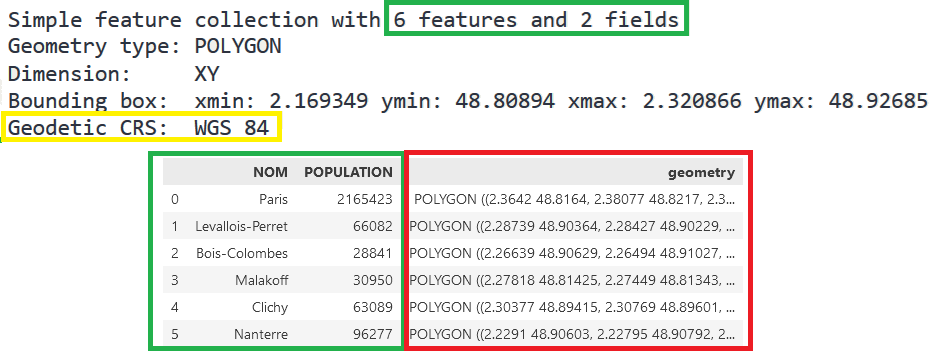

1.  Les **attributs**. Ce sont les valeurs associées à chaque niveau géographique.
    Il s’agit de la dimension tabulaire usuelle, dont le traitement est similaire
    à celui d’un objet `Pandas` classique.
2.  Les **géométries**. Ce sont les valeurs numériques interprétées pour représenter la dimension géographique. Elles permettent de représenter dans un certain
    référentiel (le système de référence) la dimension géographique.
3.  Le **système de référence**. Il s’agit du système permettant de transformer les positions sur
    le globe (3 dimensions avec une boule asymétrique) en un plan en deux dimensions.
    Il en existe une multitude, identifiables à partir d’un code EPSG (4326, 2154…).
    Leur manipulation est facilitée par `Geopandas` qui s’appuie sur `Shapely`, de la même
    manière que `Pandas` s’appuie sur `Numpy` ou `Arrow`.

# 3. Lire et enrichir des données spatiales

Dans le chapitre précédent, nous avons évoqué les formats de données
plats comme le `CSV` ou les nouveaux formats comme `Parquet`. Ceux-ci
sont adaptés à des données tabulaires.
Pour des données géographiques,
qui stockent de l’information selon plusieurs dimensions (les attributs
et la géométrie), il existe des formats spécialisés.

## 3.1 Le format *shapefile* (`.shp`) et le *geopackage* (`.gpkg`)

Le format historique de stockage de données spatiales est le *[shapefile](https://fr.wikipedia.org/wiki/Shapefile)*. Il s’agit d’un format propriétaire, développé par ESRI, qui est néanmoins devenu une norme *de facto*. Dans ce format, la donnée est stockée dans plusieurs fichiers:

-   `data.shp` : contient les géométries des entités spatiales (points, lignes, polygones…).
-   `data.shx` : un index pour accéder rapidement aux géométries stockées dans le fichier `.shp`.
-   `data.dbf` : une table attributaire au format dBase qui contient les informations descriptives des entités spatiales.
-   `data.prj` : contient les informations de projection et de système de coordonnées (nous reviendrons sur ce concept ultérieurement).

Ce format présente plusieurs inconvénients. Tout d’abord il est assez volumineux ; certains formats modernes seront plus optimisés pour réduire la volumétrie sur disque et le temps de chargement des données. Surtout, le problème principal du *shapefile* est que pour lire les données de manière intègre, il est nécessaire de partager de manière systématique ces quatre fichiers, sous peine d’introduire un risque de corruption ou d’incomplétude de la donnée. En faisant `gpd.read_file("data.shp")`, `GeoPandas`
fait lui-même le lien entre les observations et leur représentation spatiale qui sont présents dans plusieurs fichiers.

Le format `GeoPackage` est un héritier spirituel du *shapefile* visant à résoudre ces deux limites. Il s’agit d’un format libre recommandé par l’*open geospatial consortium* (OGC). Les géomaticiens apprécient ce format, il s’agit d’ailleurs du format par défaut de QGIS, le logiciel spécialisé pour les SIG. Néanmoins, même si `GeoPandas` fonctionne bien avec ce format, celui-ci est moins connu par les *data scientists* que le *shapefile* ou que le *geojson* que nous allons décrire par la suite.

## 3.2 Le GeoJSON et le TopoJSON

Le développement d’un format concurrent l’hégémonie du *shapefile* est intrinsèquement lié à l’émergence des technologies *web* dans le secteur de la cartographie. Ces technologies web s’appuient sur Javascript et reposent sur les standards du format JSON.

Le format *GeoJSON* stocke dans un seul fichier à la fois les attributs et les géométries. Il est donc assez pratique à l’usage et s’est imposé comme le format préféré des développeurs web. Le fait de stocker l’ensemble de l’information dans un seul fichier peut cependant le rendre assez volumineux si les géométries sont très précises, mais le volume reste moindre que celui du *shapefile*. `GeoPandas` est très bien fait pour lire des fichiers au format GeoJSON et les plateformes de partage de données, comme `data.gouv` privilégient ce format à celui du *shapefile*.

Pour alléger le fichier, le format `TopoJSON` a récémment émergé. Celui-ci est construit selon les mêmes principes que le `GeoJSON` mais réduit le volume de données géométriques stockées en ne conservant pas tous les points en appliquant une simplification pour ne conserver que les arcs et les directions entre ceux-ci. Ce format étant récent, il n’est pas encore bien intégré à l’écosystème `Python`.

## 3.3 Les autres formats de données

L’écosystème des formats de données géographiques est bien plus éclaté que celui des données structurées. Chaque format présente des avantages qui le rendent intéressant pour un type de données mais des limites qui l’empêchent de devenir un standard pour d’autres types de données.

Par exemple, les données GPS extraites de diverses applications (par exemple `Strava`) sont stockées au format GPX. Ce dernier est particulièrement adapté pour des traces géolocalisées avec une altitude. Mais ce n’est pas le format le plus approprié pour stocker des lignes directionnelles, un prérequis indispensable pour les applications d’itinéraires.

Les formats *shapefile* et *geojson* sont suffisamment malléables pour s’adapter aux différents types de données géographiques même s’il ne s’agit
pas du format optimal pour tel ou tel type de données. Dans cette classe généraliste de formats, le `Geoparquet` pourrait être le prochain format à la mode. Comme son nom l’indique, il s’agit d’une extension du format `Parquet` à des données géographiques. Ce format n’est pas encore mûr mais reste à suivre, la masse d’utilisateurs de l’écosystème `Parquet` pouvant amener à un changement rapide si une implémentation stable de `Geoparquet` émerge.

Cette [page](https://si.ecrins-parcnational.com/blog/2020-02-geojson-shapefile-geopackage.html) compare plus en détail les principes formats de données géographiques.
L’aide de [`Geopandas`](https://geopandas.org/io.html) propose des bouts de code en fonction des différentes situations dans lesquelles on se trouve.

## 3.4 Exercice de découverte

L’objectif de cet exercice est d’illustrer la similarité des objets
`GeoPandas` avec les objets `Pandas` que nous avons découverts précédemment.

Nous allons importer directement les données `AdminExpress` (limites officielles des communes produites par l’IGN) avec `cartiflette`:

> **Exercice 1: découverte des objets géographiques**
>
> En premier lieu, on récupère des données géographiques grâce
> au *package* `cartiflette` et à sa fonction `carti_download`.
>
> 1.  Utiliser
>     le code sous cet exercice (celui utilisant `carti_download`) pour
>     télécharger les contours communaux
>     des départements de la petite couronne (75, 92, 93 et 94)
>     de manière simplifiée grâce au *package*
>     `cartiflette`
>
> 2.  Regarder les premières lignes des données. Identifier la différence avec
>     un *dataframe* standard.
>
> 3.  Afficher le système de projection (attribut `crs`) de `communes_borders`. Ce dernier contrôle la
>     transformation de l’espace tridimensionnel terrestre en une surface plane.
>     Utiliser `to_crs` pour transformer les données en Lambert 93, le
>     système officiel (code EPSG 2154).
>
> 4.  Afficher les communes des Hauts de Seine (département 92) et utiliser la méthode
>     `plot`
>
> 5.  Ne conserver que Paris et réprésenter les frontières sur une carte : quel est le problème pour
>     une analyse de Paris intramuros?
>
> On remarque rapidement le problème.
> On ne dispose ainsi pas des limites des arrondissements parisiens, ce
> qui appauvrit grandement la carte de Paris.
>
> 1.  Cette fois, utiliser l’argument `borders="COMMUNE_ARRONDISSEMENT"` pour obtenir
>     un fonds de carte consolidé des communes avec les arrondissements dans les grandes villes.
>     Convertir en Lambert 93.

In [4]:
# 1. Chargement des données de Cartiflette
from cartiflette import carti_download
communes_borders = carti_download(
    crs = 4326,
    values = ["75", "92", "93", "94"],
    borders="COMMUNE",
    vectorfile_format="geojson",
    filter_by="DEPARTEMENT",
    source="EXPRESS-COG-CARTO-TERRITOIRE",
    year=2022)

ModuleNotFoundError: No module named 'cartiflette'

La visualisation proposée à la question permet de voir que notre *DataFrame* comporte la colonne *geometry* qui contient les informations nécessaires pour connaître les contours communaux.

Les données sont en WGS84, on les reprojette en Lambert 93

A la question 5, on remarque facilement le problème pour Paris: il manque les limites des arrondissements. Cela appauvrit grandement la carte de Paris.

A l’issue de la question 6, on obtient la carte attendue pour Paris intramuros:

# 4. Le système de projection cartographique

## 4.1 Principe

Les données spatiales sont
plus riches que les données traditionnelles car elles
incluent, habituellement, des éléments supplémentaires pour placer dans
un espace cartésien les objets. Cette dimension supplémentaire peut être simple
(un point comporte deux informations supplémentaire: $x$ et $y$) ou
assez complexe (polygones, lignes avec direction, etc.).

L’analyse cartographique emprunte dès lors à la géométrie
des concepts
pour représenter des objets dans l’espace. Les **projections**
sont au coeur de la gestion des données spatiales.
Ces dernières consistent à transformer une position dans l’espace
terrestre à une position sur un plan. Il s’agit donc d’une opération
de projection d’un espace tri-dimensionnel dans un espace
à deux dimensions.
Ce [post](https://www.earthdatascience.org/courses/earth-analytics/spatial-data-r/geographic-vs-projected-coordinate-reference-systems-UTM/) propose de riches éléments sur le
sujet, notamment l’image suivante qui montre bien le principe d’une projection :

<figure>
<img src="https://www.earthdatascience.org/images/courses/earth-analytics/spatial-data/spatial-projection-transformations-crs.png" alt="Les différents types de projection" />
<figcaption aria-hidden="true">Les différents types de projection</figcaption>
</figure>

Cette opération n’est pas neutre. L’une des conséquences du
[théorème remarquable de Gauss](https://fr.wikipedia.org/wiki/Theorema_egregium)
est que la surface de la Terre ne peut être cartographiée sans distortion.
Une projection ne peut simultanément conserver intactes les distances et les
angles (i.e. les positions).
Il n’existe ainsi pas de projection universellement meilleure, ce qui ouvre
la porte à la coexistence de nombreuses projections différentes, pensées
pour des tâches différentes.
Un mauvais système de représentation
fausse l’appréciation visuelle mais peut aussi entraîner des erreurs dans
les calculs sur la dimension spatiale.

**Les systèmes de projection font l’objet de standards internationaux et sont souvent désignés par des codes dits codes EPSG**. Ce [site](https://epsg.io/) est un bon aide-mémoire. Les plus fréquents, pour les utilisateurs français, sont les suivants (plus d’infos [ici](https://geodesie.ign.fr/contenu/fichiers/documentation/SRCfrance.pdf)) :

-   `2154` : système de projection Lambert 93. Il s’agit du système de projection officiel. La plupart des données diffusées par l’administration pour la métropole sont disponibles dans ce système de projection.
-   `27572` : Lambert II étendu. Il s’agit de l’ancien système de projection officiel. Les données spatiales anciennes peuvent être dans ce format.
-   `4326` : WGS 84 ou système de pseudo-Mercator Ce n’est en réalité pas un système de projection mais un système de coordonnées (longitude / latitude) qui permet simplement un repérage angulaire sur l’ellipsoïde. Il est utilisé pour les données GPS. Il s’agit du système le plus
    usuel, notamment quand on travaille avec des fonds de carte *web*.

## 4.2 Le système Mercator

Comme évoqué plus haut, l’une des projections les plus connues est la projection Web Mercator (code EPSG 3857), qui projète sur les cartes planes les données sphériques de longitude, latitude issues du système WGS84 (EPSG 4326), qui est le système géodésique utilisé par le [GNSS](https://en.wikipedia.org/wiki/Satellite_navigation) américain [**GPS**](https://en.wikipedia.org/wiki/Global_Positioning_System), utilisé par l’immense majorité des systèmes de navigation mondiaux, et a fortiori Google Maps. Il
s’agit d’une projection conservant intacte les angles, ce
qui implique qu’elle altère les distances. Celle-ci a en effet été
pensée, à l’origine, pour représenter l’hémisphère Nord. Plus
on s’éloigne de celui-ci, plus les distances sont distordues. Cela
amène à des distorsions bien
connues (le Groenland hypertrophié, l’Afrique de taille réduite, l’Antarctique démesuré…).
En revanche, la projection Mercator conserve intacte les positions.
C’est cette propriété qui explique son utilisation dans les systèmes
GPS et ainsi dans les fonds de carte de navigation du type *Google Maps*.
Il s’agit d’une projection pensée d’abord pour la navigation, non pour la représentation d’informations socioéconomiques sur la terre. Cette projection est indissociable des grandes explorations de la Renaissance, comme le rappelle [ce fil](https://x.com/JulesGrandin/status/1765668642094514447) sur Twitter de Jules Grandin.

<figure>
<img src="https://minio.lab.sspcloud.fr/lgaliana/generative-art/pythonds/truesize.png" alt="Exemple de reprojection de pays depuis le site thetruesize.com" />
<figcaption aria-hidden="true"><em>Exemple de reprojection de pays depuis le site <a href="https://thetruesize.com/">thetruesize.com</a></em></figcaption>
</figure>

<figure id="fig-mercator-funny">
<img src="https://rgeo.linogaliana.fr/exercises/img/mercator.jpg" />
<figcaption>Figure 4.1: “Don’t trust the Mercator projection” sur <code>Reddit</code></figcaption>
</figure>

Pour aller plus loin, la carte interactive
suivante, construite par Nicolas Lambert, issue de
ce [*notebook* `Observable`](https://observablehq.com/@neocartocnrs/impact-of-projections-on-areas), illustre l’effet
déformant de la projection Mercator, et de quelques-unes autres,
sur notre perception de la taille des pays.

Il existe en fait de nombreuses représentations possibles du monde, plus ou moins
alambiquées. Les projections sont très nombreuses et certaines peuvent avoir une [forme suprenante](https://imgs.xkcd.com/comics/map_projections.png).
Par exemple,
la [projection de Spillhaus](https://storymaps.arcgis.com/stories/756bcae18d304a1eac140f19f4d5cb3d)
propose de centrer la vue sur les océans et non une terre. C’est pour
cette raison qu’on parle parfois de monde tel que vu par les poissons
à son propos.

> **Astuce pour la France**
>
> Pour la France, dans le système WGS84 (4326) :
>
> -   Longitude ($x$) tourne autour de 0° (de -5.2 à +9.6 pour être plus précis)
> -   La latitude ($y$) autour de 45 (entre +41.3 à +51.1)
>
> Dans le système Lambert 93 (2154) :
>
> -   Coordonnées $x$: entre 100 000 et 1 300 000
> -   La latitude ($y$): entre 6 000 000 et 7 200 000
>
> [Plus de détails](https://medium.com/@_FrancoisM/introduction-%C3%A0-la-manipulation-de-donn%C3%A9es-cartographiques-23b4e38d8f0f)

## 4.3 Gestion avec `GeoPandas`

Concernant la gestion des projections avec `GeoPandas`,
la [documentation officielle](https://geopandas.org/projections.html) est très bien
faite. Elle fournit notamment l’avertissement suivant qu’il est
bon d’avoir en tête :

> Be aware that most of the time you don’t have to set a projection. Data loaded from a reputable source (using the geopandas.read_file() command) should always include projection information. You can see an objects current CRS through the GeoSeries.crs attribute.
>
> From time to time, however, you may get data that does not include a projection. In this situation, you have to set the CRS so geopandas knows how to interpret the coordinates.

<figure>
<img src="https://imgs.xkcd.com/comics/bad_map_projection_south_america.png" alt="Image empruntée à XKCD https://xkcd.com/2256/ qu’on peut également trouver sur https://blog.chrislansdown.com/2020/01/17/a-great-map-projection-joke/" />
<figcaption aria-hidden="true"><em>Image empruntée à XKCD <a href="https://xkcd.com/2256/" class="uri">https://xkcd.com/2256/</a> qu’on peut également trouver sur <a href="https://blog.chrislansdown.com/2020/01/17/a-great-map-projection-joke/" class="uri">https://blog.chrislansdown.com/2020/01/17/a-great-map-projection-joke/</a></em></figcaption>
</figure>

Les deux principales méthodes pour définir le système de projection utilisé sont :

-   **`df.set_crs`** : cette commande sert à préciser quel est le système de projection utilisé, c’est-à-dire comment les coordonnées *(x,y)* sont reliées à la surface terrestre. **Cette commande ne doit pas être utilisée pour transformer le système de coordonnées, seulement pour le définir**.
-   **`df.to_crs`** : **cette commande sert à projeter les points d’une géométrie dans une autre, c’est-à-dire à recalculer les coordonnées selon un autre système de projection.**

Dans le cas particulier de production de carte avec un fond `OpenStreetMaps` ou une carte dynamique `leaflet`, il est nécessaire de dé-projeter les données (par exemple à partir du Lambert-93) pour atterrir dans le système non-projeté WGS 84 (code EPSG 4326). Ce site [dédié aux projections géographiques](https://epsg.io/) peut être utile pour retrouver le système de projection d’un fichier où il n’est pas indiqué.

Le prochain exercice permettra, avec quelques cas pathologiques, de se convaincre de l’importance de déléguer le plus possible la gestion du système de projection à `GeoPandas`. La question n’est pas que sur la pertinence de la représentation des objets géographiques sur la carte. En effet, l’ensemble des opérations géométriques (calculs d’aires, de distance, etc.) peut être affecté par les choix faits sur le système de projection.

## 4.4 Exercice pour comprendre l’importance du système de projection

Voici un code utilisant encore
`cartiflette`
pour récupérer les frontières françaises (découpées par région):

In [ ]:
from cartiflette import carti_download
france = carti_download(
      values = ["France"],
      crs = 4326,
      borders = "REGION",
      vectorfile_format="geojson",
      simplification=50,
      filter_by="FRANCE_ENTIERE",
      source="EXPRESS-COG-CARTO-TERRITOIRE",
      year=2022)
france = france.loc[france['INSEE_REG']>10]

# Exercice imporvisé par le prof

     codgeo nom_officiel_commune_arrondissement_municipal  p20_pop  p14_pop  \
0     77121                                     Collégien     3339     3329   
1     77249                                       Lésigny     7125     7387   
2     77273                                   Marchémoret      594      557   
3     78010                            Les Alluets-le-Roi     1215     1237   
4     78036                                    Autouillet      612      470   
...     ...                                           ...      ...      ...   
1282  94077                             Villeneuve-le-Roi    21411    19870   
1283  95424                       Montigny-lès-Cormeilles    22186    21116   
1284  95427                                     Montmagny    14550    13757   
1285  95641                                        Vémars     2710     2359   
1286  75110                      Paris 10e Arrondissement    83459    92228   

      superf  nais1420  dece1420       p20_men  nai

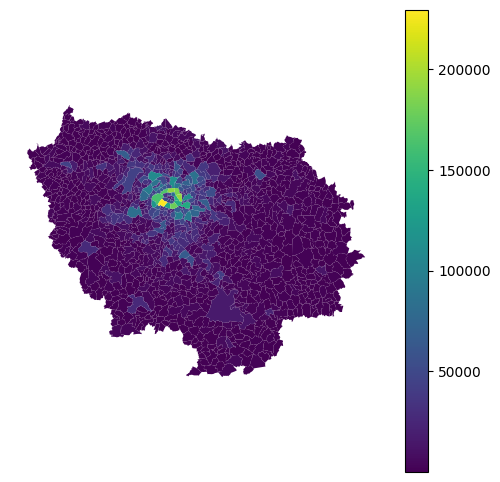

In [11]:
file_path = "../data/base-comparateur-de-territoires.geojson"

import geopandas as gpd

gdf_comp = gpd.read_file(file_path)

print(gdf_comp)

# le code mercator st le 3857

import matplotlib.pyplot as plt
fig, ax=plt.subplots(1,1,figsize=(6,6))
gdf_comp_mercator=gdf_comp.to_crs(epsg=3857) # c'est le mercator, le plan standard en cartographie

gdf_comp_mercator.plot(column="p20_pop", legend=True, ax=ax)

ax.set_axis_off()

> **Exercice 2 : Les projections, représentations et approximations**
>
> 1.  S’amuser à représenter les limites de la France avec plusieurs projections:
>
> -   Mercator WGS84 (EPSG: 4326)
> -   Projection healpix (`+proj=healpix +lon_0=0 +a=1`)
> -   Projection prévue pour Tahiti (EPSG: 3304)
> -   Projection Albers prévue pour Etats-Unis (EPSG: 5070)
>
> 1.  Calculer la superficie en $km^2$
>     des régions françaises dans les deux systèmes de projection suivants :
>     World Mercator WGS84 (EPSG: 3395) et Lambert 93 (EPSG: 2154). Calculer la différence en $km^2$
>     pour chaque région.

Avec la question 1 illustrant quelques cas pathologiques,
on comprend que les projections ont un effet déformant
qui se voit bien lorsqu’on les représente côte à côte sous
forme de cartes :

Cependant le problème n’est pas que visuel, il est également
numérique. Les calculs géométriques amènent à des différences
assez notables selon le système de référence utilisé.

On peut représenter ces approximations sur une carte[1] pour se faire une idée des régions où l’erreur de mesure est la plus importante (objet de la question 2).

[1] This map is not too neat; it’s normal. We will see how to make beautiful maps later.

Ce type d’erreur de mesure est normal à l’échelle du territoire français.
Les projections héritères du Mercator déforment les distances,
surtout lorsqu’on se rapproche de l’équateur ou des pôles.

Il faut donc systématiquement
repasser les données dans le système de projection Lambert 93 (le
système officiel pour la métropole) avant d’effectuer des calculs géométriques.

# 5. Importer et explorer les jeux de données spatiaux

Souvent, le découpage communal ne sert qu’en fond de cartes, pour donner des
repères. En général, il sert donc à contextualiser un autre jeu de données.

Pour illustrer cette approche, on va partir des données de localisation et de capacités des
stations velib,
disponibles [sur le site d’open data de la ville de Paris](https://opendata.paris.fr/explore/dataset/velib-emplacement-des-stations/table/) et
requêtables directement par l’url
<https://opendata.paris.fr/explore/dataset/velib-emplacement-des-stations/download/?format=geojson&timezone=Europe/Berlin&lang=fr>. Ce jeu de données nous permettra d’illustrer quelques enjeux classiques de l’analyse de données spatiales

In [ ]:
velib_data = 'https://opendata.paris.fr/explore/dataset/velib-emplacement-des-stations/download/?format=geojson&timezone=Europe/Berlin&lang=fr'
stations = gpd.read_file(velib_data)
stations.head(2)

Skipping field coordonnees_geo: unsupported OGR type: 3

## 5.1 Localiser les données sur une carte

La première étape, avant l’exploration approfondie des données, consiste à afficher celles-ci sur une carte contextuelle, afin de s’assurer de l’emprise géographique des données.
Dans notre cas, cela nous donnera une intuition sur la localisation des stations et notamment la densité hétérogène de celles-ci dans l’espace urbain parisien.

## 5.2 Exercice d’application

Dans le prochain exercice, nous proposons de créer rapidement une
carte comprenant trois couches :

-   Les localisations de stations sous forme de points ;
-   Les bordures des communes et arrondissements pour contextualiser ;
-   Les bordures des départements en traits plus larges pour contextualiser également.

Nous irons plus loin dans le travail cartographique dans le prochain
chapitre. Mais être en mesure de positionner rapidement
ses données sur une carte est
toujours utile dans un travail exploratoire.

En amont de l’exercice,
utiliser la fonction suivante du *package* `cartiflette` pour récupérer
le fonds de carte des départements de la petite couronne:

In [ ]:
idf = carti_download(
      values = ["11"],
      crs = 4326,
      borders = "DEPARTEMENT",
      vectorfile_format="geojson",
      filter_by="REGION",
      source="EXPRESS-COG-CARTO-TERRITOIRE",
      year=2022)

petite_couronne_departements = (
  idf
  .loc[idf['INSEE_DEP'].isin(["75","92","93","94"])]
  .to_crs(2154)
)

> **Exercice 3: importer et explorer les données velib**
>
> On commence par récupérer les données nécessaires à la production
> de cette carte.
>
> 1.  Vérifier la projection géographique de `station` (attribut `crs`). Si celle-ci est différente des données communales, reprojeter ces
>     dernières dans le même système de projection que les stations de vélib
> 2.  Ne conserver que les 50 principales stations (variable `capacity`)
>
> On peut maintenant construire la carte de manière séquentielle avec la méthode `plot` en s’aidant de [cette documentation](https://geopandas.org/en/stable/docs/user_guide/mapping.html#maps-with-layers)
>
> 1.  En premier lieu, grâce à `boundary.plot`,
>     représenter la couche de base des limites des communes et arrondissements:
>
>     -   Utiliser les options `edgecolor = "black"` et `linewidth = 0.5`
>     -   Nommer cet objet `base`
>
> 2.  Ajouter la couche des départements avec les options `edgecolor = "blue"` et `linewidth = 0.7`
>
> 3.  Ajouter les positions des stations
>     et ajuster la taille en fonction de la variable `capacity`. L’esthétique des points obtenus peut être contrôlé grâce aux options `color = "red"` et `alpha = 0.4`.
>
> 4.  Retirer les axes et ajouter un titre avec les options ci-dessous:
>
> ``` python
> base.set_axis_off()
> base.set_title("Les 50 principales stations de Vélib")
> ```
>
> 1.  En suivant le modèle suivant, grâce au *package* `contextily`, ajouter un fond de carte contextuel *openstreetmap*
>
> ``` python
> import contextily as ctx
> ax = ...
> ctx.add_basemap(ax, source = ctx.providers.OpenStreetMap.Mapnik)
> ```
>
> ⚠️ `contextily` attend des données dans le système de représentation *Pseudo Mercator* ([EPSG: 3857](https://epsg.io/3857)), il sera donc nécessaire de reprojeter vos données avant de réaliser la carte.

La couche de base obtenue à l’issue de la question 3

Puis en y ajoutant les limites départementales (question 4).

Puis les stations (question 5).

Ensuite, si on retire les axes (question 6), on obtient:

La carte est déjà parlante en soi. Néanmoins, pour des personnes moins familières de la géographie parisienne, elle pourrait être encore plus limpide avec l’ajout d’un fond de carte contextuel *openstreetmap*. *In fine*, cela donne la carte suivante:

## 5.3 Opérations sur les géométries

Outre la représentation graphique simplifiée,
l’intérêt principal d’utiliser
`GeoPandas` est l’existence de méthodes efficaces pour
manipuler la dimension spatiale. Un certain nombre proviennent du
package
[`Shapely`](https://shapely.readthedocs.io/en/latest/manual.html#general-attributes-and-methods).

Nous avons déjà vu la méthode `to_crs` pour reprojeter les données de manière vectorisée sans avoir à s’inquiéter.
Nous avons également évoqué la méthode `area`
pour calculer des surfaces. Il en existe de nombreuses et l’objectif de ce chapitre n’est pas d’être exhaustif sur le sujet mais plutôt de servir d’introduction générale pour amener à approfondir ultérieurement.
Parmi les méthodes les plus utiles, on peut citer `centroid` qui, comme son nom l’indique,
recherche le centroïde de chaque polygone et transforme ainsi des données
surfaciques en données ponctuelles. Par exemple, pour
représenter approximativement les centres des villages de la
Haute-Garonne (31), après avoir téléchargé le fonds de carte adapté, on
fera

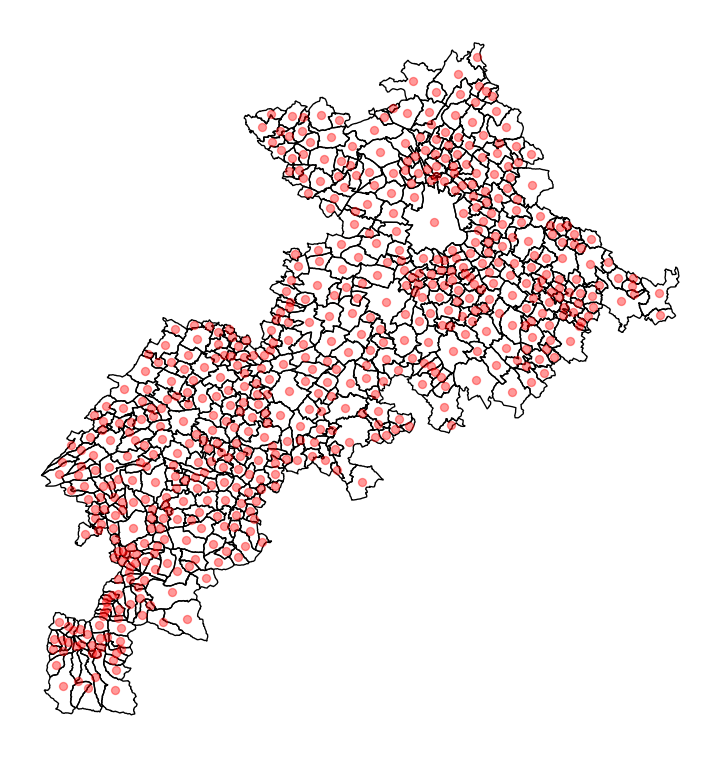

In [ ]:
from cartiflette import carti_download
communes_31 = carti_download(
      values = ["31"],
      crs = 4326,
      borders="COMMUNE",
      vectorfile_format="geojson",
      filter_by="DEPARTEMENT",
      source="EXPRESS-COG-CARTO-TERRITOIRE",
      year=2022)

# on reprojete en 3857 pour le fond de carte
communes_31 = communes_31.to_crs(3857)

# on calcule le centroide
dep_31 = communes_31.copy()
communes_31['geometry'] = communes_31['geometry'].centroid

ax = communes_31.plot(figsize = (10,10), color = 'red', alpha = 0.4, zorder=2)
dep_31.to_crs(3857).plot(
  ax = ax, zorder=1,
  edgecolor = "black",
  facecolor="none", color = None
)
#ctx.add_basemap(ax, source = ctx.providers.Stamen.Toner)
ax.set_axis_off()
ax

Par conséquent, avec `Geopandas`, l’ensemble de la grammaire `Pandas` peut être mobilisée pour traiter la dimension attributaire des données alors que la dimension géographique pourra être manipulée avec des méthodes adaptées.

# 6. Enrichissements grâce à la dimension spatiale: les jointures spatiales

## 6.1 Principe

La carte précédente illustre déjà la puissance de la représentation cartographique. En quelques lignes de code, avec très peu d’opérations sur nos données, on comprend déjà mieux le phénomène qu’on désire observer. En l’occurrence, on détecte très clairement une structure centre-périphérie dans nos données, ce qui n’est pas surprenant mais qu’il est rassurant de retrouver au premier abord.

On remarque également que les stations les plus utilisées, à l’extérieur de l’hypercentre parisien, sont généralement situées sur les grands axes ou à proximité des parcs. Là encore, rien de surprenant mais il est rassurant de retrouver ceci dans nos données.

On peut maintenant explorer de manière plus approfondie la structure de notre jeu de données. Cependant si on observe celui-ci, on remarque qu’on a peu d’informations dans le jeu de données brutes

In [ ]:
stations.head(2)

Dans le chapitre précédent, nous avons présenté la manière dont l’association de jeux de données par une dimension commune permet d’accroître la valeur de celles-ci. En l’occurrence, il s’agissait d’appariements de données sur la base d’informations communes dans les deux jeux de données.

Nous avons maintenant une information supplémentaire implicite dans nos deux de données: la dimension géographique. On parle de jointure spatiale pour désigner l’association de jeux de données sur la dimension géographique. Il existe de nombreux types différents de jointures spatiales: trouver des points dans un polygone, trouver l’intersection entre plusieurs aires, relier un point à son plus proche voisin dans une autre source, etc.

## 6.2 Exemple: localiser les stations dans leur arrondissement

Dans cet exercice, on va supposer que :

-   les localisations des stations `velib`
    sont stockées dans un *dataframe* nommé `stations`
-   les données administratives
    sont dans un *dataframe* nommé `petite_couronne`.

> **Exercice 4: Associer les stations aux communes et arrondissements auxquels elles appartiennent**
>
> 1.  Faire une jointure spatiale pour enrichir les données de stations en y ajoutant des informations de `petite_couronne`. Appeler cet objet `stations_info`.
> 2.  Compter le nombre de stations et la taille médiane des stations par arrondissements
> 3.  Créer les objets `stations_19e` et `arrondissement_19e` pour stocker, respectivement,
>     les stations appartenant au 19e et les limites de l’arrondissement.
> 4.  Compter le nombre de stations velib et le nombre de places velib par arrondissement ou commune. Représenter sur une carte chacune des informations
> 5.  Représenter la carte des stations du 19e arrondissement avec le code suivant :
>
> ``` python
> base = petite_couronne.loc[petite_couronne['INSEE_DEP']=="75"].boundary.plot(edgecolor = "k", linewidth=0.5)
> arrondissement_19e.boundary.plot(ax = base, edgecolor = "red", linewidth=0.9)
> stations_19.plot(ax = base, color = "red", alpha = 0.4)
> base.set_axis_off()
> base.set_title("Les stations Vélib du 19e arrondissement")
> base
> ```
>
> En reprenant les exemples précédents, ne représenter que le 19e et ajouter un fond de carte *openstreetmap* pour mieux localiser les stations.
>
> 1.  Représenter les mêmes informations mais en densité (diviser par la surface de l’arrondissement ou commune en km2)

A l’issue de la jointure spatiale, le jeu de données présente la structure suivante

On peut donc calculer des statistiques par arrondissement, comme on le ferait avec un `DataFrame Pandas` (question 2):

Néanmoins des cartes seront sans doute plus parlante. Pour commencer, avec la question 3, on peut représenter les stations du 19e arrondissement, d’abord dans l’ensemble de Paris.

On peut ensuite zoomer sur cet arrondissement et faire une carte avec un fond plus travaillé:

Carte obtenue à la question 5 :

Avec cette carte, basée sur des aplats de couleurs (*choropleth map*), le lecteur est victime d’une illusion classique. Les arrondissements les plus visibles sur la carte sont les plus grands. D’ailleurs c’est assez logique qu’ils soient également mieux pourvus en velib. Même si l’offre de velib est probablement plus reliée à la densité de population et d’équipements, on peut penser que l’effet taille joue et que celui-ci est certainement le phénomène le plus visible sur notre carte alors qu’il ne s’agit peut-être pas du facteur de premier ordre en réalité.

Si on représente plutôt la capacité sous forme de densité, pour tenir compte de la taille différente des arrondissements, les conclusions sont inversées et correspondent mieux aux attentes d’un modèle centre-périphérie. Les arrondissements centraux sont mieux pourvus. Si nous faisions une carte avec des ronds proportionnels plutôt qu’une carte chorolèpthe, cela serait encore plus visible ; néanmoins la cartographie n’est pas l’objet de ce chapitre.

## 6.3 Exercice supplémentaire

Les exercices précédents ont permis de se familiariser au traitement de données
spatiales. Néanmoins il arrive fréquemment de devoir jongler de manière plus ardue avec la
dimension géométrique. Il peut s’agir, par exemple, de changer d’échelle territoriale dans les données ou d’introduire
des fusions/dissolutions de géométries.

Nous allons illustrer cela avec un exercice supplémentaire illustrant, en pratique, comment travailler des données dans les modèles d’économie urbaine où on fait l’hypothèse de déplacements au plus proche point ([modèle d’Hotelling](https://fr.wikipedia.org/wiki/Loi_de_Hotelling)).

Imaginons que chaque utilisateur de velib se déplace exclusivement
vers la station la plus proche (à supposer qu’il n’y a jamais pénurie
ou surcapacité). Quelle est la carte de la couverture des vélibs ?
Pour répondre à ce type de question, on utilise fréquemment la
la [tesselation de Voronoï](https://fr.wikipedia.org/wiki/Diagramme_de_Vorono%C3%AF),
une opération classique pour transformer des points en polygones.

L’exercice suivant
permet de se familiariser avec la construction de *voronoi* [1].

> **Exercice 5 (optionnel): La carte de couverture des stations**
>
> Cet exercice est plus complexe parce qu’il implique de revenir à `Shapely`, une librairie plus bas niveau que `GeoPandas`.
>
> Cet exercice est laissé libre. Une source d’inspiration possible est cette discussion sur [StackExchange](https://gis.stackexchange.com/questions/337561/making-polygon-for-every-point-in-set-using-voronoi-diagram).
>
> L’objectif est de faire deux cartes de couverture: une au niveau de la petite couronne et l’autre seulement au sein de Paris intramuros.

La première carte de couverture, au niveau de l’agglomération dans son ensemble,
permet de voir la densité plus importante des
stations velib dans le centre parisien:

[1] In [this working paper](https://www.insee.fr/en/statistiques/4925202) on mobile phone data, it is shown that this approach is not without bias in phenomena where the spatial proximity hypothesis is overly simplistic.

Si on zoome sur Paris intramuros, on a également une hétérogénéité dans la couverture.
On a moins d’hétérogénéité dans les surfaces de couverture puisque la densité est importante mais on remarque néanmoins des divergences entre certains espaces.

# 7. Références

# 8. References

Chen, Chun-houh, Wolfgang Härdle, Antony Unwin, et Michael Friendly. 2008. « A brief history of data visualization ». *Handbook of data visualization*, 15‑56.